**Import Library**

In [54]:
import cv2
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



warnings.filterwarnings("ignore")
%matplotlib inline

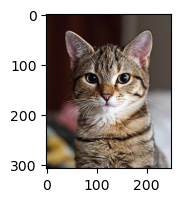

In [55]:
plt.figure(figsize=(2,2))
#read an image
imagedata = plt.imread("/kaggle/input/catimage-processing/catimage_processing.jpg")
#To show the image
plt.imshow(imagedata)
#grid method to arrange labels or not
plt.grid(False)
plt.show()

In [56]:
#shape(), provides image dimension like height,width & color Channel
imagedata.shape

(308, 250, 3)

In [57]:
#To show height
imagedata.shape[0]

308

In [58]:
#To show width
imagedata.shape[1]

250

In [59]:
print("image shape: {}".format(imagedata.shape))
print("Imamge size is: Image height: {} Image width: {} and Color Channel:{}".format(imagedata.shape[0],imagedata.shape[1],imagedata.shape[2]),imagedata.size)

image shape: (308, 250, 3)
Imamge size is: Image height: 308 Image width: 250 and Color Channel:3 231000


In [60]:

    def catimage (imageTitle,image):
        imavariable=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)#Converting image BGR to RGB by using cvtColor()
        plt.figure(figsize=(2,2))
        plt.imshow( imavariable)
        plt.title(imageTitle)# Here we will represent the title
        plt.grid(False)
        plt.show()


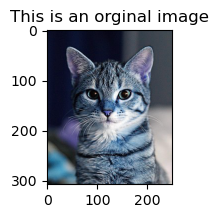

In [61]:
catimage("This is an orginal image",  imagedata)

In [62]:
imagedata.shape[:2] #Only show height & width

(308, 250)

In [63]:
imagedata

array([[[ 40,  16,  12],
        [ 37,  13,   9],
        [ 36,  12,   8],
        ...,
        [ 83,  74,  67],
        [ 87,  78,  71],
        [ 85,  76,  71]],

       [[ 40,  16,  12],
        [ 37,  13,   9],
        [ 37,  13,   9],
        ...,
        [ 78,  69,  62],
        [ 84,  75,  68],
        [ 85,  76,  69]],

       [[ 39,  15,  11],
        [ 38,  14,  10],
        [ 38,  14,  10],
        ...,
        [ 83,  74,  67],
        [ 82,  73,  66],
        [ 85,  76,  69]],

       ...,

       [[ 17,  16,  14],
        [ 16,  15,  13],
        [ 16,  15,  13],
        ...,
        [196, 201, 207],
        [207, 212, 218],
        [212, 219, 227]],

       [[ 14,  13,  11],
        [ 13,  12,  10],
        [ 14,  13,  11],
        ...,
        [200, 205, 211],
        [206, 211, 217],
        [211, 218, 226]],

       [[ 16,  15,  13],
        [ 14,  13,  11],
        [ 15,  14,  12],
        ...,
        [203, 208, 214],
        [205, 210, 216],
        [210, 217, 225]]

**Image Masking**

It is one kind of shadow information.It does not effect on orginal image.
To create mask using Numpy library & zeros() method

In [64]:

image_mask=np.zeros(imagedata.shape[:2],dtype="uint8")

In [65]:
image_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [66]:
cv2.rectangle(image_mask, (0, 450), (50, 250), 255, -1)#rectangle() is a function of OpenCV library which is used to draw rectangle on image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

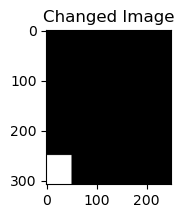

In [67]:
catimage("Changed Image",image_mask)

In [68]:
cv2.circle(image_mask,(100,100),100,255,-1)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

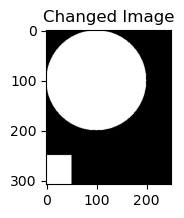

In [69]:
catimage("Changed Image",image_mask)

**Bitwise Operation**

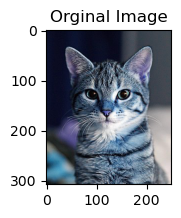

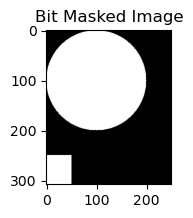

In [70]:
#argumentimage is used for storing image in the form of dictionary
argumentimage={"image":"/kaggle/input/catimage-processing/catimage_processing.jpg",
              "scharr": 0}##scharr needed for derivative gray image. We need this parameter when we implement edge detection.
imagedata=plt.imread(argumentimage["image"])
catimage("Orginal Image",imagedata)
bit_mask=cv2.bitwise_and(imagedata,imagedata,mask=image_mask)
catimage("Bit Masked Image",image_mask)

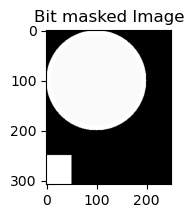

In [71]:
cv2.circle(image_mask, (100, 100), 90, 250, -1)
bit_mask = cv2.bitwise_or(imagedata, imagedata, mask = image_mask)
catimage("Bit masked Image", image_mask)

**Resize Image**

In [72]:
imagedata

array([[[ 40,  16,  12],
        [ 37,  13,   9],
        [ 36,  12,   8],
        ...,
        [ 83,  74,  67],
        [ 87,  78,  71],
        [ 85,  76,  71]],

       [[ 40,  16,  12],
        [ 37,  13,   9],
        [ 37,  13,   9],
        ...,
        [ 78,  69,  62],
        [ 84,  75,  68],
        [ 85,  76,  69]],

       [[ 39,  15,  11],
        [ 38,  14,  10],
        [ 38,  14,  10],
        ...,
        [ 83,  74,  67],
        [ 82,  73,  66],
        [ 85,  76,  69]],

       ...,

       [[ 17,  16,  14],
        [ 16,  15,  13],
        [ 16,  15,  13],
        ...,
        [196, 201, 207],
        [207, 212, 218],
        [212, 219, 227]],

       [[ 14,  13,  11],
        [ 13,  12,  10],
        [ 14,  13,  11],
        ...,
        [200, 205, 211],
        [206, 211, 217],
        [211, 218, 226]],

       [[ 16,  15,  13],
        [ 14,  13,  11],
        [ 15,  14,  12],
        ...,
        [203, 208, 214],
        [205, 210, 216],
        [210, 217, 225]]

In [73]:
min(imagedata[0][0])

12

In [74]:
max(imagedata[0][0])

40

In [75]:
#image scaling=it has two part Normalization,Standardrization
imagedata/255

array([[[0.15686275, 0.0627451 , 0.04705882],
        [0.14509804, 0.05098039, 0.03529412],
        [0.14117647, 0.04705882, 0.03137255],
        ...,
        [0.3254902 , 0.29019608, 0.2627451 ],
        [0.34117647, 0.30588235, 0.27843137],
        [0.33333333, 0.29803922, 0.27843137]],

       [[0.15686275, 0.0627451 , 0.04705882],
        [0.14509804, 0.05098039, 0.03529412],
        [0.14509804, 0.05098039, 0.03529412],
        ...,
        [0.30588235, 0.27058824, 0.24313725],
        [0.32941176, 0.29411765, 0.26666667],
        [0.33333333, 0.29803922, 0.27058824]],

       [[0.15294118, 0.05882353, 0.04313725],
        [0.14901961, 0.05490196, 0.03921569],
        [0.14901961, 0.05490196, 0.03921569],
        ...,
        [0.3254902 , 0.29019608, 0.2627451 ],
        [0.32156863, 0.28627451, 0.25882353],
        [0.33333333, 0.29803922, 0.27058824]],

       ...,

       [[0.06666667, 0.0627451 , 0.05490196],
        [0.0627451 , 0.05882353, 0.05098039],
        [0.0627451 , 0

In [76]:
CustomValueHeight=120/imagedata.shape[0] #120 magic Number

In [77]:
CustomValueHeight

0.38961038961038963

In [78]:
CustomValueWidth=120/imagedata.shape[0] #120 magic Number

In [79]:
CustomValueWidth

0.38961038961038963

In [80]:
imageDimension = (120, int(imagedata.shape[0] * CustomValueWidth)) #original width * custom width

In [81]:
imageDimension


(120, 120)

In [82]:
imagedata.shape

(308, 250, 3)

In [83]:
308*0.38961038961038963

120.0

In [84]:
print("imageDimension:",imageDimension)

imageDimension: (120, 120)


In [85]:
newimage=cv2.resize(imagedata,imageDimension,interpolation=cv2.INTER_AREA)

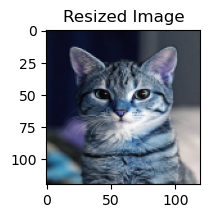

In [86]:
catimage("Resized Image",newimage)

In [87]:
newimage.shape

(120, 120, 3)

**Image Rotation**

In [88]:
(imageH,imageW)=imagedata.shape[:2]

In [89]:
(centerX,centerY)=(imageH//2,imageW//2)

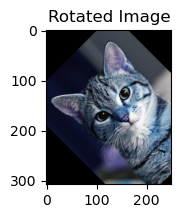

In [90]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),45,1.0) #45=Degree,1.0=Scaling
rotatenow=cv2.warpAffine(imagedata,imageRotate,(imageW,imageH))
catimage("Rotated Image",rotatenow)

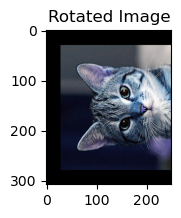

In [91]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),90,1.0) #45=Degree,1.0=Scaling
rotatenow=cv2.warpAffine(imagedata,imageRotate,(imageW,imageH))
catimage("Rotated Image",rotatenow)

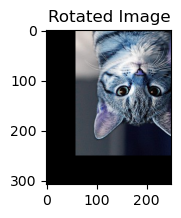

In [92]:
imageRotate=cv2.getRotationMatrix2D((centerX,centerY),180,1.0) #45=Degree,1.0=Scaling
rotatenow=cv2.warpAffine(imagedata,imageRotate,(imageW,imageH))
catimage("Rotated Image",rotatenow)

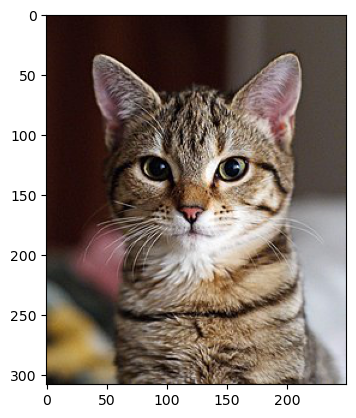

In [93]:
plt.imshow(imagedata)

**Sobel Operation**

In [94]:
#step-1:Convert images to Gray
imageGray=cv2.cvtColor(imagedata,cv2.COLOR_BGR2GRAY)


In [95]:
imageGray.shape #After gray ,it has two dimension

(308, 250)

In [96]:
#Kernel generate
kernelGen=-1 if argumentimage["scharr"]>1 else 3

In [99]:
gradienImageDataX = cv2.Sobel(imageGray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = kernelGen)
gradienImageDataY = cv2.Sobel(imageGray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = kernelGen)

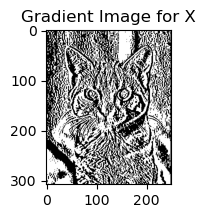

In [100]:
catimage("Gradient Image for X",gradienImageDataX)

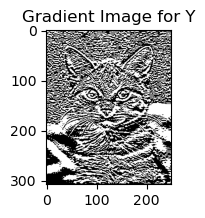

In [101]:
catimage("Gradient Image for Y",gradienImageDataY)

In [102]:
gradienImageDataY

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   3.,   6., ...,  -4., -11., -12.],
       [  2.,   5.,   7., ...,   9.,   3.,  -4.],
       ...,
       [-32., -29., -20., ...,  25.,   5.,  -4.],
       [ -6.,  -6.,  -4., ...,  20.,   1.,  -8.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

In [103]:
gradienImageDataX

array([[  0., -14.,   4., ...,  10.,  20.,   0.],
       [  0., -11.,   4., ...,   4.,  19.,   0.],
       [  0.,  -5.,   3., ...,  -1.,  11.,   0.],
       ...,
       [  0.,  -5.,   2., ...,  95.,  75.,   0.],
       [  0.,  -2.,  10., ...,  74.,  57.,   0.],
       [  0.,  -2.,  12., ...,  64.,  48.,   0.]], dtype=float32)